# Graphene / metal oxide powders x-ray diffraction

## Comparison of x-ray diffractions in the process of heating the samples

### Plot componds of your choice
Select which compound you want to plot and to be displayed in normal or logarithmic scale

You can specify whether to show the plots in jupyter or save the on your computer

In [3]:
import itertools
import notebook_finder
import xray_plots_helper_classes as xphc

# color themes ~> to modify a color theme, copy existing one and insert your changes there
#                                      CuO/CuCl2  ZnO/CuCl2  Zno/FeCl3                   CuO/CuCl2  ZnO/CuCl2  Zno/FeCl3
themes_first_suggestions = {'theme' : ["#960018", "#456456", "#FFE5B4"], 'background' : ["#faeeee", "#defdef", "#4B201A"]}
themes_from_xrayholders  = {'theme' : ["#faeeee", "#defdef", "#FFE5B4"], 'background' : ["#6D3721", "#CCB78A", "#4B201A"]}

# select your color theme from the options above
theme = themes_from_xrayholders

# powders
electroCuOCucl2 = xphc.PowderAfterElectrolysis('CuO', 'CuCl2', 'Cu', theme['background'][0], theme['theme'][0])
electroZnOCucl2 = xphc.PowderAfterElectrolysis('ZnO', 'CuCl2', 'Cu', theme['background'][1], theme['theme'][1])
electroZnOFeCl3 = xphc.PowderAfterElectrolysis('ZnO', 'FeCl3', 'Steel', theme['background'][2], theme['theme'][2])

# select compounds you would like to have plotted 
chosenFormulas = [electroZnOCucl2, electroZnOFeCl3, electroCuOCucl2]

# Paremeters to literate through for all combinations
isLogarithmic = [False, True]

# colors of the plots
plotsColors = ['#124872', '#fa2436', '#24fafa']

# Choose whether to save figures on the disk or show inline
saveOnDisk = False

# iterate through combinations and make figuresx
for x in list(itertools.product(chosenFormulas, isLogarithmic)):
    xphc.plotBeforeAfterHeating(x[0], x[1], saveOnDisk, plotsColors)
    

## Comparison of Graphene/CuO in CuCl2 to top 4 matches in database

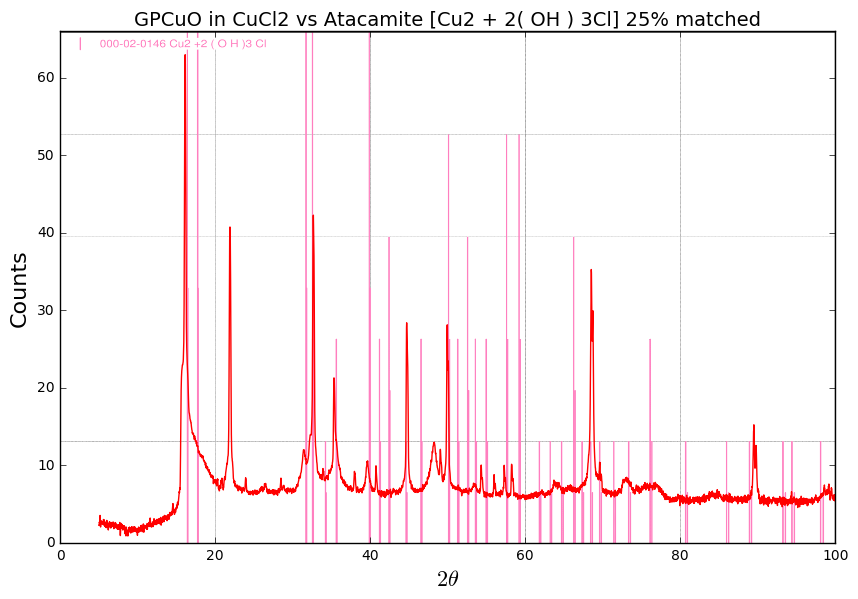

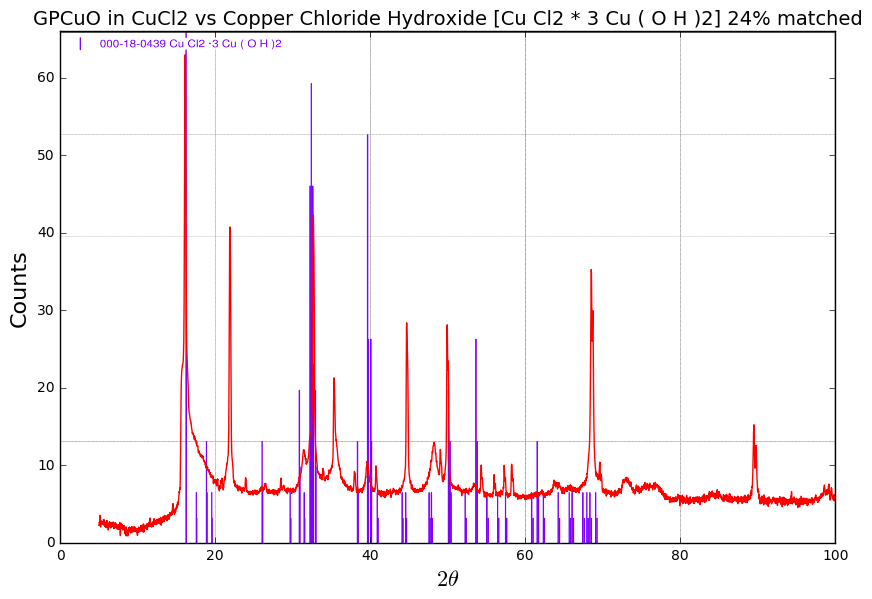

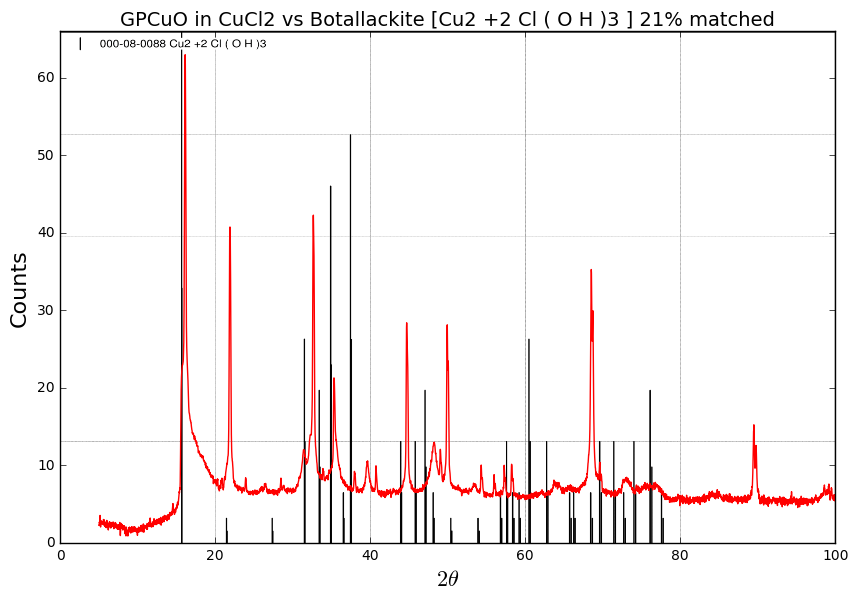

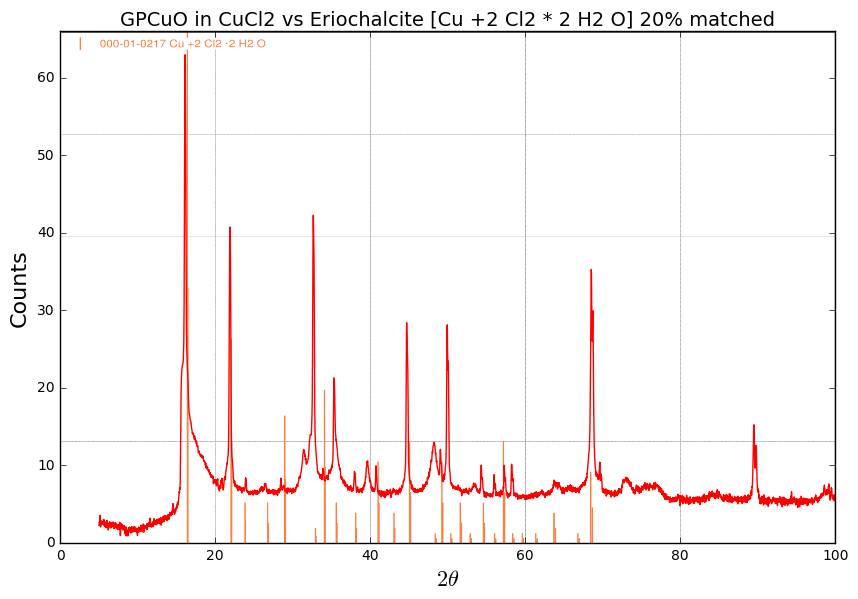

In [2]:
import csv
import matplotlib.pyplot as plt
from scipy.misc import imread
import numpy as np
from PIL import Image

x = []
y = []

with open('xrd/CuOCuCl2_before.xy','r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        x.append(row[0])
        y.append(row[1])

y = [np.log10(float(i))*20-66 for i in y]

matchFileNamesTop = [['Atacamite', 'Cu2 + 2( OH ) 3Cl', '25%'], 
                     ['Copper Chloride Hydroxide', 'Cu Cl2 * 3 Cu ( O H )2', '24%'], 
                     ['Botallackite', 'Cu2 +2 Cl ( O H )3 ', '21%'],
                     ['Eriochalcite', 'Cu +2 Cl2 * 2 H2 O', '20%']]

for mf in matchFileNamesTop:
    fig = plt.figure(figsize=(10, 7), dpi=100)
    # figure's title
    plt.title(r"GPCuO in CuCl2 vs " + mf[0] + " [" + mf[1] + "] " + mf[2] + " matched", fontsize=14)
    #img = Image.open("cytherea.jpg"), 
    img = Image.open("graphs/" + mf[0] + "-1.png")
    img = img.crop( (116,1140,1587,2220) )
    #fig1, ax1 = plt.subplots()
    lines= plt.plot(x,y,'r', zorder=1)
    # ax1.set_yscale('log')
    plt.imshow(img, zorder=0, extent=[0, 100, 0, 66])
    plt.xlabel(r'$2 \theta$', fontsize=16)
    plt.ylabel('Counts', fontsize=16)
    plt.show()
    # plt.savefig('figures/Graphene_CuO_CuCl2_comparison_with_database/' + mf[0] + '_topmatch.png', transparent=True)
    

